# 캐글
- 각 대회의 개요를 확인할 떄 overview 탭을 클랙해서 Description, Evaluation, Prizes 등과 메뉴를 확인할 수 있다. 
    - 주의 깊게 봐야할 탭은 Evaluation이다. 
- api를 사용하지 않고 바로 csv파일을 다운로드 받아서 캐글을 진행할 수 있지만 본 실습에서는 api를 사용해서 데이터를 받는다.
    - kaggle 홈에서 우측 프로필에서 Account를 클릭하고 API 탭에서 create new API token을 눌러서 새로 토큰을 만들면 json 파일이 생성된다. 

In [2]:
#kaggle api를 사용하기 위해서 라이브러리를 설치한다. 
!pip install kaggle

  Using cached kaggle-1.5.12.tar.gz (58 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=64a0c9825a0bcc630107685b42daddc97e5739008bceb67ded4e6771b4eec3d4
  Stored in directory: /Users/austin/Library/Caches/pip/wheels/50/0a/6a/77a4f3a534f0e5fd0909a376bbdfc88238a43eb2ac35947dc7
Successfully built kaggle


In [3]:
pip show kaggle

Name: kaggle
Version: 1.5.12
Summary: Kaggle API
Home-page: https://github.com/Kaggle/kaggle-api
Author: Kaggle
Author-email: support@kaggle.com
License: Apache 2.0
Location: /Users/austin/opt/anaconda3/lib/python3.9/site-packages
Requires: certifi, python-dateutil, python-slugify, requests, six, tqdm, urllib3
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [4]:
#구글 코랩에서는 다른 방법으로 api를 설정해야하지만 로컬 환경에서는 ~/.kaggle 경로로 json파일 경로를 수정해주면 된다. 
!kaggle competitions list

ref                                                                               deadline             category            reward  teamCount  userHasEntered  
--------------------------------------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
https://www.kaggle.com/competitions/nfl-player-contact-detection                  2023-03-01 23:59:00  Featured          $100,000        569           False  
https://www.kaggle.com/competitions/godaddy-microbusiness-density-forecasting     2023-03-14 23:59:00  Featured           $60,000       1805           False  
https://www.kaggle.com/competitions/learning-equality-curriculum-recommendations  2023-03-14 23:59:00  Featured           $55,000        546           False  
https://www.kaggle.com/competitions/lux-ai-season-2                               2023-04-24 23:59:00  Featured           $55,000         20           False  
https://www.kaggle.com/competitions/rsna-breas

In [5]:
#위에 보여진 현재 진행중인 캐글 대회들 중에서 원하는 대회의 이름을 !kaggle competitions download 뒤에 입력하면 다운받아진다. 
!kaggle competitions download house-prices-advanced-regression-techniques 

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
import pandas as pd
train = pd.read_csv('/Users/austin/Desktop/folders/kaggle_projects/house-prices-advanced-regression-techniques/train.csv')
test =  pd.read_csv('/Users/austin/Desktop/folders/kaggle_projects/house-prices-advanced-regression-techniques/test.csv')
print('Data Loading is done!')

Data Loading is done!


In [7]:
print('The shape of Train data is:', train.shape)
print('The shape of Test data is:', test.shape)

The shape of Train data is: (1460, 81)
The shape of Test data is: (1459, 80)


In [8]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcaa93313d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcaa9331af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcaa9331040>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcaa933c250>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcaa933c5e0>],
 'means': []}

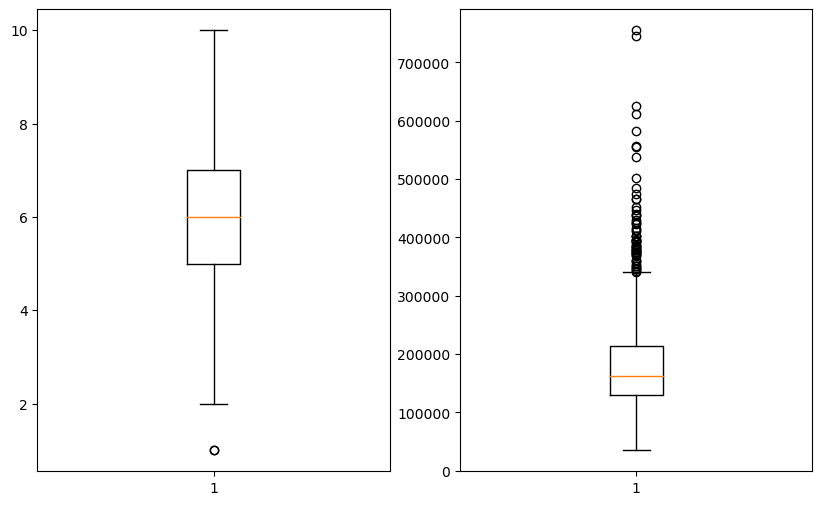

In [10]:
#이상치 제거
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('default')
fig, ax= plt.subplots(1,2, figsize = (10,6))

ax[0].boxplot([train['OverallQual']])

ax[1].boxplot(train['SalePrice'])


In [31]:
#책에서는 대략적으로 이상치라고 판단하고 제거한다. 
# train.drop(train[(train['OverallQual']<4) & (train['SalePrice']>200000)].index, inplace = True)
# train.drop(train[(train['OverallQual']>4) & (train['SalePrice']>200000)].index, inplace = True)

#조금은 더 엄밀하게 접근해보기 위해서 IQR을 구하고 제거해보니 총 1460개의 행이 남은 것을 볼 수 있다. 
q1_qual = train['OverallQual'].quantile(.25)
q3_qual = train['OverallQual'].quantile(.75)
q1_price = train['SalePrice'].quantile(.25)
q3_price = train['SalePrice'].quantile(.75)
iqr_qual = q3_qual-q1_qual
iqr_price = q3_price-q1_price
print(q1_qual - iqr_qual)
print(q3_qual + iqr_qual)
train_drop = train.drop(train[train['OverallQual']> q3_qual + iqr_qual *1.5 ].index)
train_drop = train.drop(train[train['OverallQual']< q1_qual - iqr_qual *1.5 ].index)
train_drop = train.drop(train[train['SalePrice']> q3_price + iqr_price *1.5 ].index)
train_drop = train.drop(train[train['SalePrice']< q1_price - iqr_price *1.5 ].index)


train_drop.reset_index(drop =True, inplace = True)
print(train_drop.shape)

3.0
9.0
(1460, 81)


The value of mu before log transformation is: 180921.19589041095
The value of sigma before log transformation is: 79415.29188606751


/var/folders/nh/3q0vdk7s383d4t34nv4_q89m0000gn/T/ipykernel_25837/1623753887.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


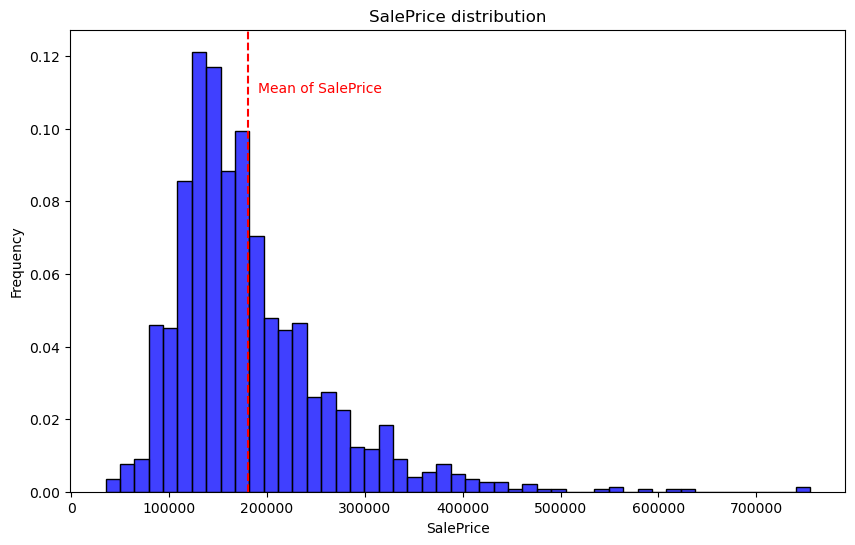

In [32]:
import seaborn as sns
from scipy.stats import norm 
(mu, sigma) = norm.fit(train_drop['SalePrice'])
print('The value of mu before log transformation is:', mu)
print('The value of sigma before log transformation is:', sigma)

fig, ax = plt.subplots(figsize = (10,6))
sns.histplot(train_drop['SalePrice'], color= 'b', stat = 'probability')
ax.xaxis.grid(False)
ax.set(ylabel= 'Frequency')
ax.set(xlabel= 'SalePrice')
ax.set(title= 'SalePrice distribution')

plt.axvline(mu, color = 'r', linestyle = '--')
plt.text(mu + 10000, 0.11, 'Mean of SalePrice', rotation = 0, color = 'r')

fig.show()

The value of mu after log transformation is: 12.024057394918406
The value of sigma after log transformation is: 0.39931245219387496


/var/folders/nh/3q0vdk7s383d4t34nv4_q89m0000gn/T/ipykernel_25837/3968853673.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


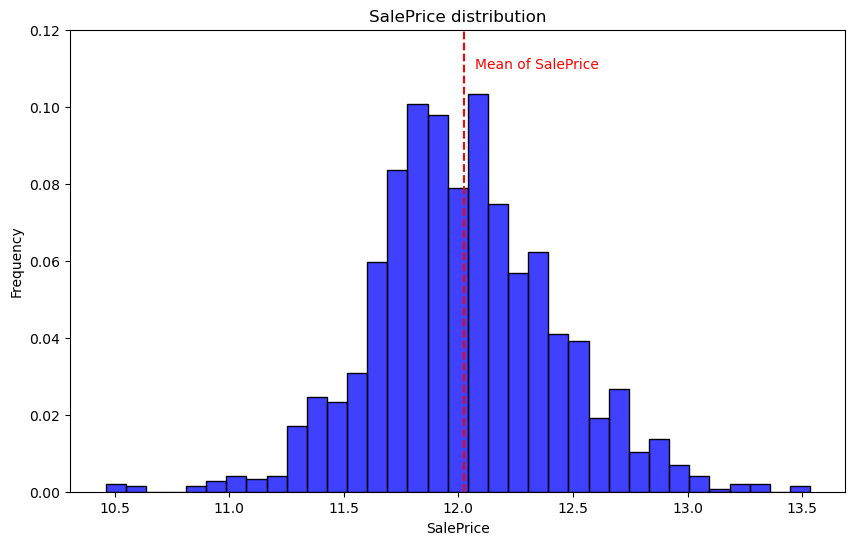

In [37]:
#log transformation으로 데이터를 정규분포에 가깝게 변환시킨다. 
#log transformation은 왜도가 +인 경우 즉 오른쪽으로 꼬리가 길 경우 사용한다. 
import numpy as np
train_drop['SalePrice'] = np.log1p(train_drop['SalePrice'])

(mu, sigma) = norm.fit(train_drop['SalePrice'])
print('The value of mu after log transformation is:', mu)
print('The value of sigma after log transformation is:', sigma)

fig, ax = plt.subplots(figsize = (10,6))
sns.histplot(train_drop['SalePrice'], color= 'b', stat = 'probability')
ax.xaxis.grid(False)
ax.set(ylabel= 'Frequency')
ax.set(xlabel= 'SalePrice')
ax.set(title= 'SalePrice distribution')

plt.axvline(mu, color = 'r', linestyle = '--')
plt.text(mu + 0.05, 0.11, 'Mean of SalePrice', rotation = 0, color = 'r')

plt.ylim(0, 0.12)
fig.show()

In [40]:
#아래는 df 합치는 과정을 진행한다. 
train_ID = train['Id']
test_ID = test['Id']
train.drop(['Id'], axis = 1, inplace = True)
test.drop(['Id'], axis = 1, inplace = True)
train.shape, test.shape

((1460, 80), (1459, 79))

In [41]:
y=train['SalePrice'].reset_index(drop=True)
train = train.drop('SalePrice', axis = 1)
train.shape, test.shape, y.shape

((1460, 79), (1459, 79), (1460,))

In [42]:
all_df = pd.concat([train, test]).reset_index(drop=True)
all_df.shape

(2919, 79)

## 결측치 처리

In [43]:
def check_na(data, head_num=6):
    isnull_na = (data.isnull().sum()/len(data)) * 100
    data_na = isnull_na.drop(isnull_na[isnull_na==0].index).sort_values(ascending= False)
    missing_data = pd.DataFrame({'Missing Ratio' : data_na,
                                 'Data Type' : data.dtypes[data_na.index]})
    print('결측치 데이터 칼럼과 건수:\n', missing_data.head(head_num))

check_na(all_df, 20)

결측치 데이터 칼럼과 건수:
               Missing Ratio Data Type
PoolQC            99.657417    object
MiscFeature       96.402878    object
Alley             93.216855    object
Fence             80.438506    object
FireplaceQu       48.646797    object
LotFrontage       16.649538   float64
GarageFinish       5.447071    object
GarageQual         5.447071    object
GarageCond         5.447071    object
GarageYrBlt        5.447071   float64
GarageType         5.378554    object
BsmtExposure       2.809181    object
BsmtCond           2.809181    object
BsmtQual           2.774923    object
BsmtFinType2       2.740665    object
BsmtFinType1       2.706406    object
MasVnrType         0.822199    object
MasVnrArea         0.787941   float64
MSZoning           0.137033    object
BsmtFullBath       0.068517   float64


In [44]:
all_df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'], axis = 1, inplace=True)
check_na(all_df,20)

결측치 데이터 칼럼과 건수:
               Missing Ratio Data Type
GarageCond         5.447071    object
GarageQual         5.447071    object
GarageYrBlt        5.447071   float64
GarageFinish       5.447071    object
GarageType         5.378554    object
BsmtCond           2.809181    object
BsmtExposure       2.809181    object
BsmtQual           2.774923    object
BsmtFinType2       2.740665    object
BsmtFinType1       2.706406    object
MasVnrType         0.822199    object
MasVnrArea         0.787941   float64
MSZoning           0.137033    object
Functional         0.068517    object
Utilities          0.068517    object
BsmtFullBath       0.068517   float64
BsmtHalfBath       0.068517   float64
GarageArea         0.034258   float64
GarageCars         0.034258   float64
TotalBsmtSF        0.034258   float64


In [46]:
#결측치를 문자열 데이터는 빈도수 중 가장 높은 값으로, 수치 데이터는 Median으로 채워 넣는다. 
import numpy as np
cat_all_vars = train.select_dtypes(exclude=[np.number])
print('the whole number of all_vars', len(list(cat_all_vars)))

final_cat_vars = []
for v in cat_all_vars:
    if v not in ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage']:
        final_cat_vars.append(v)
print('the whole number of final_cat_vars', len(final_cat_vars))

for i in final_cat_vars:
    all_df[i] = all_df[i].fillna(all_df[i].mode()[0])
check_na(all_df, 20)

the whole number of all_vars 43
the whole number of final_cat_vars 38
결측치 데이터 칼럼과 건수:
               Missing Ratio Data Type
GarageYrBlt        5.447071   float64
MasVnrArea         0.787941   float64
BsmtFullBath       0.068517   float64
BsmtHalfBath       0.068517   float64
BsmtFinSF1         0.034258   float64
BsmtFinSF2         0.034258   float64
BsmtUnfSF          0.034258   float64
TotalBsmtSF        0.034258   float64
GarageCars         0.034258   float64
GarageArea         0.034258   float64


In [52]:
#수치형 데이터를 최빈값으로 대치했다. 
num_all_vars = list(train.select_dtypes(include=[np.number]))
print('the whole number of all_vars', len(num_all_vars))
num_all_vars.remove('LotFrontage')

print('the whole number of final_cat_vars', len(num_all_vars))
for i in num_all_vars:
    all_df[i].fillna(value= all_df[i].median(), inplace=True)
    
check_na(all_df, 20)

the whole number of all_vars 36
the whole number of final_cat_vars 35
결측치 데이터 칼럼과 건수:
 Empty DataFrame
Columns: [Missing Ratio, Data Type]
Index: []
